# Day 2: Logistic Regression — Predicting Student Placement

## Step 1: Load Libraries and Dataset
We begin by importing the necessary libraries like `numpy`, `pandas`, and loading our dataset using `pandas.read_csv()`.

In [6]:
import numpy as np
import pandas as pd

In [7]:
# Load the Dataset
df = pd.read_csv('datasets/placement.csv')

## Step 2: Dataset Overview
Let's check the structure of our dataset using `.head()`, `.info()`, and `.shape()` to understand the columns, datatypes, and size.

In [8]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [10]:
df.shape

(100, 4)

## 🧹 Step 3: Preprocessing
We remove the first column since it is not needed for prediction (likely just an index or serial number). We use `.iloc` for slicing the DataFrame.

In [11]:
df = df.iloc[:,1:] # Syntax-> [start_row:end_row, start_column:end_column]

In [12]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [13]:
# Plan of Attack

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train Test Split (a.k.a Cross Validation)
# 4. Train the model
# 5. Evaluate the model/Model Selection
# 6. Deploy the model

## Step 4: Exploratory Data Analysis (EDA)
We plot a scatter plot of CGPA vs IQ and color it by placement (0 or 1) to visually understand how separable the classes are.

In [14]:
import matplotlib.pyplot as plt

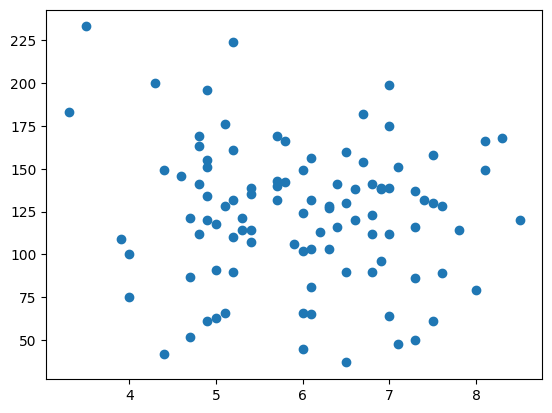

In [15]:
plt.scatter(df['cgpa'], df['iq'])

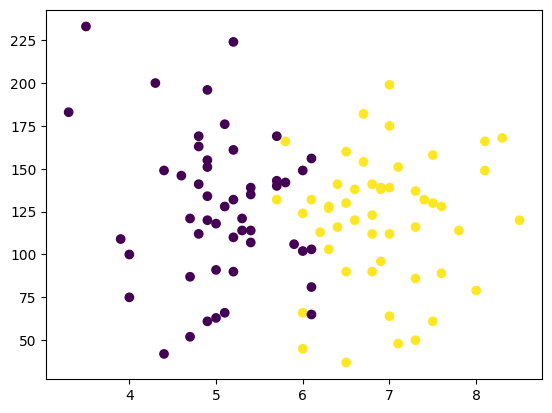

In [16]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

## Step 5: Feature and Label Extraction
Here we separate our input features (X = cgpa, iq) and output label (y = placement). We also check their shape to confirm.

In [17]:
x = df.iloc[:, 0:2]
y = df.iloc[:,-1]

In [18]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [19]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [20]:
x.shape

(100, 2)

In [21]:
y.shape

(100,)

## 🔀 Step 6: Train-Test Split
We split our dataset into training and testing sets using `train_test_split`.  
90% of the data is used for training and 10% for testing to evaluate model performance.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [25]:
x_train

,cgpa,iq
57,6.5,130.0
51,4.8,141.0
29,7.0,112.0
70,6.3,127.0
74,6.7,154.0
...,...,...
43,6.8,141.0
19,5.2,132.0
45,6.0,66.0
44,7.5,61.0


In [26]:
x_test

,cgpa,iq
95,4.3,200.0
24,4.7,121.0
13,6.4,116.0
78,6.1,81.0
92,5.2,110.0
36,5.7,140.0
60,6.9,139.0
77,7.3,50.0
15,5.1,176.0
25,5.0,91.0


In [27]:
y_train

57    1
51    0
29    1
70    1
74    1
     ..
43    1
19    0
45    1
44    1
21    1
Name: placement, Length: 90, dtype: int64

In [28]:
y_test

95    0
24    0
13    1
78    0
92    0
36    0
60    1
77    1
15    0
25    0
Name: placement, dtype: int64

## Step 7: Feature Scaling
We scale our input features using `StandardScaler` to ensure that both CGPA and IQ contribute equally to the model.  
This standardizes the features by removing the mean and scaling to unit variance.

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
x_train = scaler.fit_transform(x_train)

In [33]:
x_train

array([[ 0.41054182,  0.15926797],
       [-1.06393936,  0.43784622],
       [ 0.84421275, -0.29658735],
       [ 0.23707344,  0.08329208],
       [ 0.58401019,  0.76707506],
       [-0.97720518, -0.09398499],
       [-1.15067355, -1.81610507],
       [ 0.15033926, -0.27126205],
       [-0.28333168,  0.20991856],
       [-1.06393936,  0.99500272],
       [ 0.84421275,  1.90671335],
       [-1.75781286, -1.23362328],
       [-0.54353424, -0.24593676],
       [-0.28333168,  1.14695449],
       [-2.19148379,  2.7677734 ],
       [-0.71700261,  0.94435213],
       [ 0.41054182, -2.19598451],
       [-0.02312912, -0.5498403 ],
       [-1.41087611,  0.64044858],
       [-0.54353424,  0.28589445],
       [ 1.79828881,  1.0709786 ],
       [-0.97720518,  0.26056915],
       [-0.63026843, -0.24593676],
       [ 1.36461788, -0.87906914],
       [ 0.49727601,  0.36187033],
       [ 0.67074438, -0.85374385],
       [ 0.93094694, -1.91740626],
       [ 1.10441532, -0.19528617],
       [ 0.23707344,

In [34]:
x_test = scaler.transform(x_test)

In [35]:
x_test

array([[-1.4976103 ,  1.93203865],
       [-1.15067355, -0.06865969],
       [ 0.32380763, -0.19528617],
       [ 0.06360507, -1.08167151],
       [-0.71700261, -0.34723794],
       [-0.28333168,  0.41252092],
       [ 0.75747857,  0.38719563],
       [ 1.10441532, -1.86675566],
       [-0.8037368 ,  1.32423156],
       [-0.89047099, -0.82841855]])

## Step 8: Model Training
We use `LogisticRegression` as our model and train it using the `.fit()` method with our scaled training data.

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# clf means classifier
clf = LogisticRegression()

In [39]:
# There exist a function under LogisticRegression called `fit()` which actually trains our model. We just need to provide our training data
# Model Training
clf.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Step 9: Model Evaluation
After training, we predict on the test set and compare predictions with actual values using `accuracy_score` to evaluate performance.

In [41]:
y_pred = clf.predict(x_test)

In [42]:
y_test

95    0
24    0
13    1
78    0
92    0
36    0
60    1
77    1
15    0
25    0
Name: placement, dtype: int64

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, y_pred)

0.9

## Step 10: Visualize Decision Boundaries
We use `mlxtend.plotting.plot_decision_regions()` to visualize how our logistic regression model separates the classes (placement 0 and 1).

In [45]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

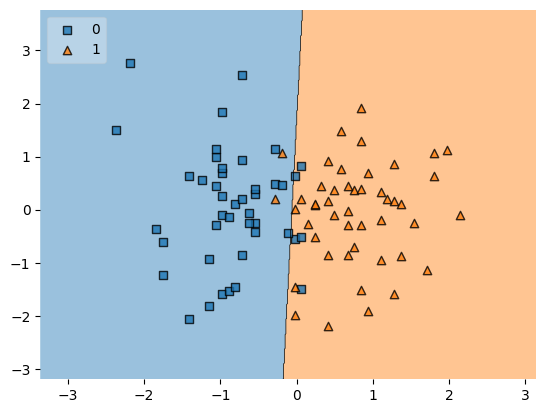

In [46]:
# Plotting decision regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

## Step 11: Save the Trained Model
We save our trained model using Python’s `pickle` module so that it can be used later without retraining.

In [48]:
import pickle

In [49]:
pickle.dump(clf, open('model.pkl', 'wb'))